<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Analisis_Multivariado/TPF_Ortega_Yubro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

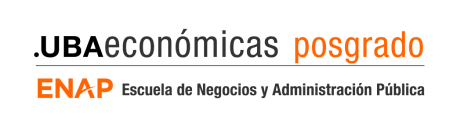

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

### Métodos de Análisis Multivariado - Trabajo Final

- Silvia VIETRI
- Silvina DEL DUCA

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Obtención de Datos


El conjunto de datos pertenece al análisis de los recursos humanos de una empresa y las columnas del dataframe representan lo siguiente:

- Nivel de satisfacción: satisfacción del empleado con la empresa.
- Ultima evaluación: calificación obtenida en la ultima evaluación.
- Numero de proyectos: proyectos en los que ha participado el empleado.
- Horas mensuales promedio: tiempo que le dedica a los proyectos.
- Tiempo dedicado: tiempo que le dedica a la empresa.
- Accidente de trabajo.
- Abandono.
- Promocion 5 años: ascensos obtenidos en los ultimos 5 años.
- Sector: sector donde se desempeña.
- Sueldo.

In [1]:
datos <- "https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Analisis_Multivariado/RecursosHumanos.csv"

In [2]:
recursoshumanos <- read.csv(datos)

In [3]:
head(recursoshumanos)

,NivelDeSatisfaccion,UltimaEvaluacion,NumeroDeProyectos,HorasMensualesPromedio,TiempoDedicado,AccidenteDeTrabajo,Abandono,Promociona5Años,Sector,Sueldo
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.41,0.50,2,153,3,0,1,0,sales,low


#### Instalando paquetes

In [4]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Habilitando librerias

In [38]:
library(tidyverse)  # para manipulación de los datos y visualización
library(gridExtra) 

In [6]:
library(ggplot2)

#### Verificando si existen NaN

In [7]:
any(is.na(recursoshumanos))

[1] FALSE

#### Preparando los datos del DataFrame

In [8]:
summary(recursoshumanos)

 NivelDeSatisfaccion UltimaEvaluacion NumeroDeProyectos HorasMensualesPromedio
 Min.   :0.0900      Min.   :0.3600   Min.   :2.000     Min.   : 96.0         
 1st Qu.:0.4400      1st Qu.:0.5600   1st Qu.:3.000     1st Qu.:156.0         
 Median :0.6400      Median :0.7200   Median :4.000     Median :200.0         
 Mean   :0.6128      Mean   :0.7161   Mean   :3.803     Mean   :201.1         
 3rd Qu.:0.8200      3rd Qu.:0.8700   3rd Qu.:5.000     3rd Qu.:245.0         
 Max.   :1.0000      Max.   :1.0000   Max.   :7.000     Max.   :310.0         
 TiempoDedicado   AccidenteDeTrabajo    Abandono      Promociona5Años  
 Min.   : 2.000   Min.   :0.0000     Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 3.000   1st Qu.:0.0000     1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 3.000   Median :0.0000     Median :0.0000   Median :0.00000  
 Mean   : 3.498   Mean   :0.1446     Mean   :0.2381   Mean   :0.02127  
 3rd Qu.: 4.000   3rd Qu.:0.0000     3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :10.000

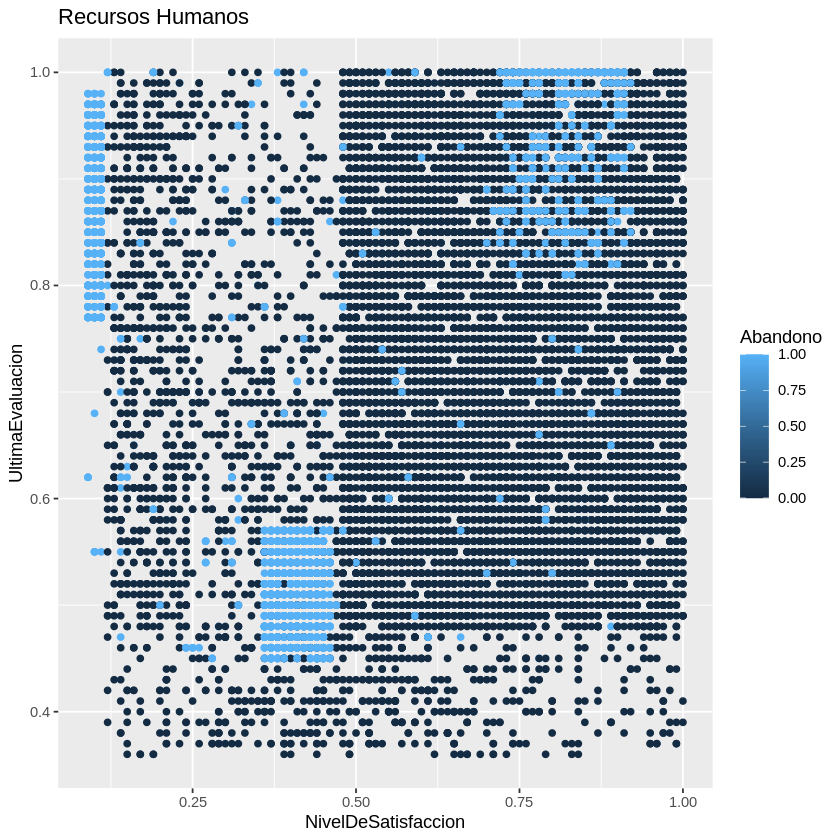

In [9]:
ggplot(recursoshumanos, aes(x = NivelDeSatisfaccion, y = UltimaEvaluacion, colour = Abandono)) + geom_point() + labs(title = "Recursos Humanos")

Claramente se puede visualizar que existen tres grandes grupos que abandonaron la empresa y esos abandonos en su mayoria tienen que ver con los resultados de la ultima evaluación, su nivel de satisfacción con la empresa y los salarios que reciben.

Se procede a eliminar las columnas que poseen datos no numéricos...

In [10]:
recursoshumanos02 <- select(recursoshumanos, -Sector, -Sueldo)

In [11]:
summary(recursoshumanos02)

 NivelDeSatisfaccion UltimaEvaluacion NumeroDeProyectos HorasMensualesPromedio
 Min.   :0.0900      Min.   :0.3600   Min.   :2.000     Min.   : 96.0         
 1st Qu.:0.4400      1st Qu.:0.5600   1st Qu.:3.000     1st Qu.:156.0         
 Median :0.6400      Median :0.7200   Median :4.000     Median :200.0         
 Mean   :0.6128      Mean   :0.7161   Mean   :3.803     Mean   :201.1         
 3rd Qu.:0.8200      3rd Qu.:0.8700   3rd Qu.:5.000     3rd Qu.:245.0         
 Max.   :1.0000      Max.   :1.0000   Max.   :7.000     Max.   :310.0         
 TiempoDedicado   AccidenteDeTrabajo    Abandono      Promociona5Años  
 Min.   : 2.000   Min.   :0.0000     Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 3.000   1st Qu.:0.0000     1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 3.000   Median :0.0000     Median :0.0000   Median :0.00000  
 Mean   : 3.498   Mean   :0.1446     Mean   :0.2381   Mean   :0.02127  
 3rd Qu.: 4.000   3rd Qu.:0.0000     3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :10.000

Como las variables tienen escalas diferentes, se procede a la estandarización de las variables.

In [12]:
recursoshumanos03 <- apply(recursoshumanos02, 2, scale)

In [13]:
summary(recursoshumanos03)

 NivelDeSatisfaccion UltimaEvaluacion   NumeroDeProyectos
 Min.   :-2.1029     Min.   :-2.08041   Min.   :-1.4628  
 1st Qu.:-0.6951     1st Qu.:-0.91197   1st Qu.:-0.6515  
 Median : 0.1093     Median : 0.02277   Median : 0.1598  
 Mean   : 0.0000     Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.8332     3rd Qu.: 0.89910   3rd Qu.: 0.9711  
 Max.   : 1.5572     Max.   : 1.65858   Max.   : 2.5937  
 HorasMensualesPromedio TiempoDedicado    AccidenteDeTrabajo    Abandono     
 Min.   :-2.10340       Min.   :-1.0261   Min.   :-0.4112    Min.   :-0.559  
 1st Qu.:-0.90203       1st Qu.:-0.3412   1st Qu.:-0.4112    1st Qu.:-0.559  
 Median :-0.02103       Median :-0.3412   Median :-0.4112    Median :-0.559  
 Mean   : 0.00000       Mean   : 0.0000   Mean   : 0.0000    Mean   : 0.000  
 3rd Qu.: 0.87999       3rd Qu.: 0.3436   3rd Qu.:-0.4112    3rd Qu.:-0.559  
 Max.   : 2.18148       Max.   : 4.4528   Max.   : 2.4320    Max.   : 1.789  
 Promociona5Años  
 Min.   :-0.1474  
 1st Qu.:-

### Primer método Análisis de Componentes Principales

#### Componentes Principales sin normalizar

#####***Calculo de la covarianza***

Para calcular los componentes principales, comenzamos usando la función cov( ) para calcular la matriz de covarianza.

In [14]:
recursoshumanos02.cov <- cov(recursoshumanos02) # para calcular covarianza con datos sin estandarizar

#####***Valores de la matriz***

Usamos el comando eigen( ) para calcular los valores propios de la matriz. Este comando asignado a un objeto le proporcionarálos autovalores ordenados (\$values) como la matriz de autovectores (\$vectors)

In [15]:
recursoshumanos02.eigen <- eigen(recursoshumanos02.cov)

In [16]:
str(recursoshumanos02.eigen) # Visualización de los valores y de los vectores

List of 2
 $ values : num [1:8] 2494.617 2.175 1.184 0.197 0.116 ...
 $ vectors: num [1:8, 1:8] -0.0001 0.00116 0.0103 0.99994 0.00374 ...
 - attr(*, "class")= chr "eigen"


#####***Tomando solo los dos primeros conjuntos de datos...***

- PC1 Nivel de satisfacción
- PC2 Ultima evaluación

In [17]:
matriz <- recursoshumanos02.eigen$vectors[,1:2]

In [18]:
matriz <- -matriz

In [19]:
colnames(matriz) <- c("PC1", "PC2")
matriz

PC1,PC2
1.000332e-04,-0.0222798744
-1.164546e-03,0.0153049805
-1.030169e-02,0.2712310222
-9.999391e-01,-0.0064333403
-3.739056e-03,0.9612326004
7.143353e-05,0.0002850254
-6.080727e-04,0.0406830170
1.022201e-05,0.0061974521


Cada vector de componente principal define una dirección en el espacio de características. Debido a que los vectores propios son ortogonales a todos los demás vectores propios, las cargas y, por lo tanto, los componentes principales no están correlacionados entre sí y forman la base del nuevo espacio. Esto es cierto sin importar cuántas dimensiones se utilicen

#####***Análisis de los componentes principales***

In [20]:
recursos02.pca.cor = prcomp(recursoshumanos02, center=TRUE, scale.=FALSE)

In [21]:
summary(recursos02.pca.cor)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     49.9461 1.47474 1.08832 0.44356 0.34077 0.22112 0.15154
Proportion of Variance  0.9985 0.00087 0.00047 0.00008 0.00005 0.00002 0.00001
Cumulative Proportion   0.9985 0.99936 0.99984 0.99992 0.99996 0.99998 0.99999
                           PC8
Standard deviation     0.14332
Proportion of Variance 0.00001
Cumulative Proportion  1.00000

#####***Puntuación de los componentes principales***

Si proyectamos los $n$ puntos de datos
$X_1,...,X_n$ en el primer vector propio, los valores proyectados se denominan puntuaciones de componentes principales para cada observación

In [22]:
PC1 <- as.matrix(recursoshumanos02) %*% matriz[,1]
PC2 <- as.matrix(recursoshumanos02) %*% matriz[,2]

#####***Creación del DataFrame con la puntuación de los componentes principales***

In [23]:
puntuacion <- data.frame(Abandono = recursoshumanos02$Abandono, PC1, PC2)

In [24]:
head(puntuacion)

,Abandono,PC1,PC2
,<int>,<dbl>,<dbl>
1,1,-157.0234,2.456454
2,1,-262.0595,5.474037
3,1,-272.0721,4.045380
4,1,-223.0582,4.765640
5,1,-159.0233,2.443657
6,1,-153.0236,2.481060


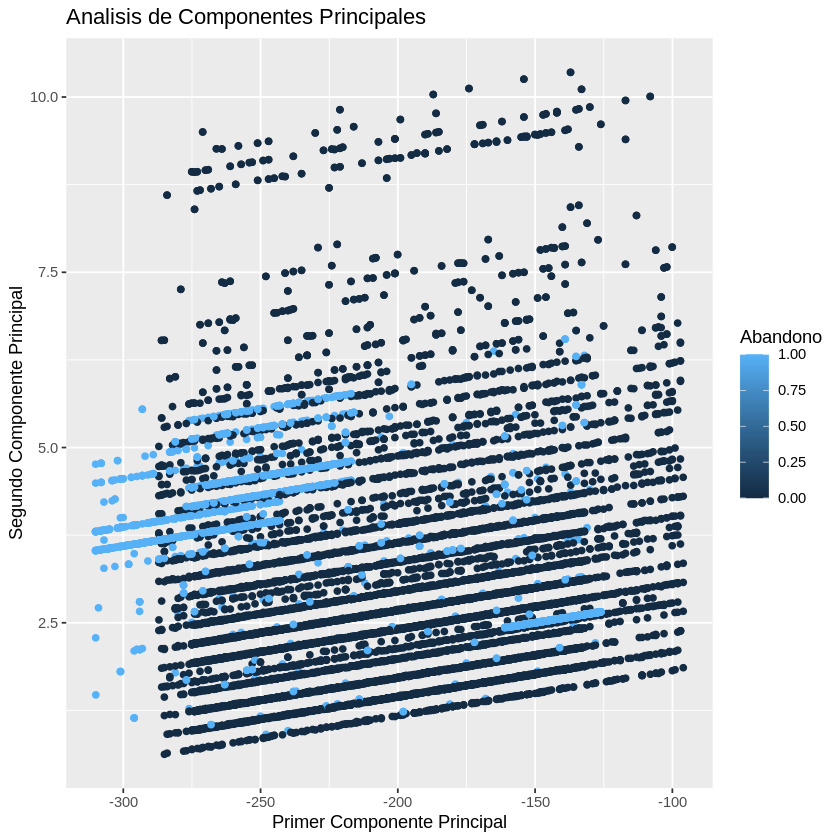

In [25]:
ggplot(puntuacion, aes(x = PC1, y = PC2, colour = Abandono)) + geom_point() + xlab("Primer Componente Principal") + ylab("Segundo Componente Principal") + labs(title = "Analisis de Componentes Principales")

#### Componentes Principales Normalizados

#####***Calculo de la covarianza***

Para calcular los componentes principales, comenzamos usando la función cov( ) para calcular la matriz de covarianza.

In [26]:
recursoshumanos03.cov <- cov(recursoshumanos03) # para calcular covarianza

#####***Valores de la matriz***

Usamos el comando eigen( ) para calcular los valores propios de la matriz. Este comando asigna a un objeto los autovalores ordenados (\$values) como la matriz de autovectores (\$vectors)

In [27]:
recursoshumanos03.eigen <- eigen(recursoshumanos03.cov)

In [28]:
str(recursoshumanos03.eigen) # Visualización de los valores y de los vectores

List of 2
 $ values : num [1:8] 1.861 1.464 1.061 0.956 0.845 ...
 $ vectors: num [1:8, 1:8] 0.19 -0.464 -0.557 -0.526 -0.334 ...
 - attr(*, "class")= chr "eigen"


#####***Tomando solo los dos primeros conjuntos de datos...***

- PC1 Nivel de satisfacción
- PC2 Ultima evaluación

In [29]:
(matriz <- recursoshumanos03.eigen$vectors[,1:2])

0.189561861,-0.6082581
-0.463637154,-0.3122288
-0.557047026,-0.1225429
-0.525595871,-0.1785367
-0.333951324,0.1170926
0.064439228,-0.2814044
-0.216339403,0.6163127
0.008708814,-0.1135893


In [30]:
matriz <- -matriz

In [31]:
colnames(matriz) <- c("PC1", "PC2")
matriz

PC1,PC2
-0.189561861,0.6082581
0.463637154,0.3122288
0.557047026,0.1225429
0.525595871,0.1785367
0.333951324,-0.1170926
-0.064439228,0.2814044
0.216339403,-0.6163127
-0.008708814,0.1135893


Cada vector de componente principal define una dirección en el espacio de características. Debido a que los vectores propios son ortogonales a todos los demás vectores propios, las cargas y, por lo tanto, los componentes principales no están correlacionados entre sí y forman la base del nuevo espacio. Esto es cierto sin importar cuántas dimensiones se utilicen

#####***Análisis de los componentes principales***

In [32]:
recursos03.pca.cor = prcomp(recursoshumanos03, center=TRUE, scale.=FALSE)

In [33]:
summary(recursos03.pca.cor)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.3642 1.2100 1.0298 0.9777 0.9195 0.84201 0.79151
Proportion of Variance 0.2326 0.1830 0.1326 0.1195 0.1057 0.08862 0.07831
Cumulative Proportion  0.2326 0.4156 0.5482 0.6677 0.7734 0.86201 0.94032
                           PC8
Standard deviation     0.69098
Proportion of Variance 0.05968
Cumulative Proportion  1.00000

#####***Puntuación de los componentes principales***

Si proyectamos los $n$ puntos de datos
$X_1,...,X_n$ en el primer vector propio, los valores proyectados se denominan puntuaciones de componentes principales para cada observación

In [34]:
PC1 <- as.matrix(recursoshumanos03) %*% matriz[,1]
PC2 <- as.matrix(recursoshumanos03) %*% matriz[,2]

#####***Creación del DataFrame con la puntuación de los componentes principales***

In [35]:
puntuacion02 <- data.frame(Abandono = recursoshumanos02$Abandono, PC1, PC2)

In [36]:
head(puntuacion02)

,Abandono,PC1,PC2
,<int>,<dbl>,<dbl>
1,1,-1.304178,-2.4407922
2,1,2.416399,-0.3783069
3,1,3.548321,-1.6348919
4,1,1.865335,-0.6150049
5,1,-1.302592,-2.4763479
6,1,-1.450406,-2.4364213


Ahora que hemos calculado el primer y segundo componente principal para el conjunto de datos de Recursos Humanos, se los puede graficar entre sí y producir una vista bidimensional de los datos. El primer componente principal (eje x) corresponde al nivel de satisfacción de los empleados con la empresa. El segundo componente (eje y) se explica con la calificación obtenida en la última evaluación que se le practicó a los empleados.

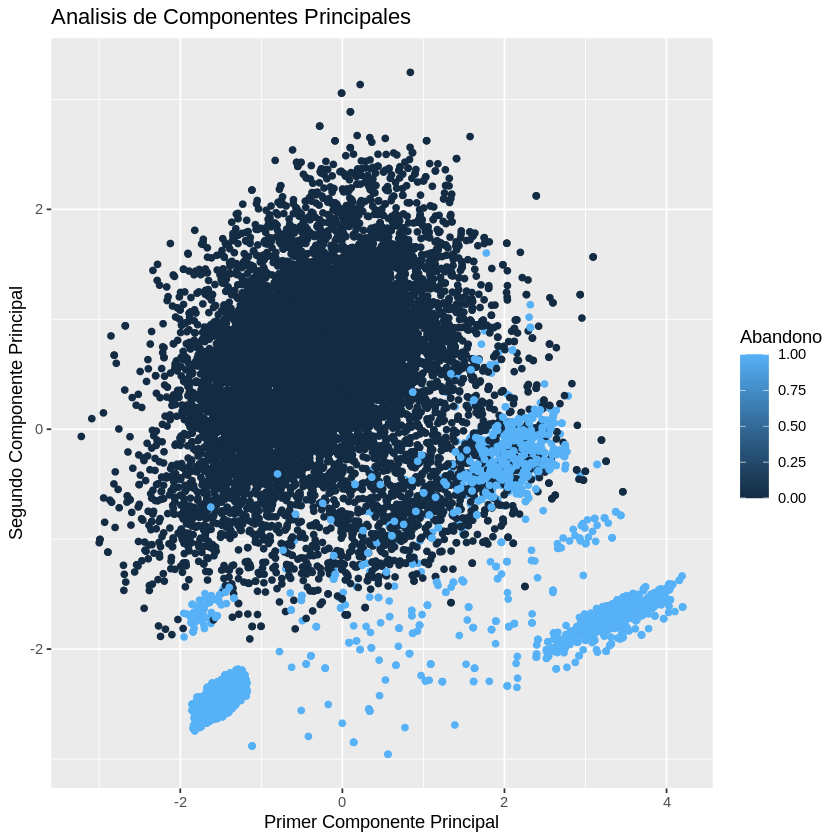

In [37]:
ggplot(puntuacion02, aes(x = PC1, y = PC2, colour = Abandono)) + geom_point() + xlab("Primer Componente Principal") + ylab("Segundo Componente Principal") + labs(title = "Analisis de Componentes Principales")

Con los valores estandarizados, es mejor la conclusión final observando en el gráfico como el primer componente influye en el abandono de los empleados, siendo el primer componente el nivel de satisfaccion que tienen los empleados en la organización y el segundo componente la calificación de su última evaluación en la organización.

#### Seleccionando el número de componentes principales

In [39]:
PVE <- recursoshumanos03.eigen$values / sum(recursoshumanos03.eigen$values)

In [40]:
round(PVE, 2)

[1] 0.23 0.18 0.13 0.12 0.11 0.09 0.08 0.06

In [53]:
PVEplot <- qplot(c(1:8), PVE) + 
  geom_line() + 
  xlab("Componentes Principales") + 
  ylab("PVE") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

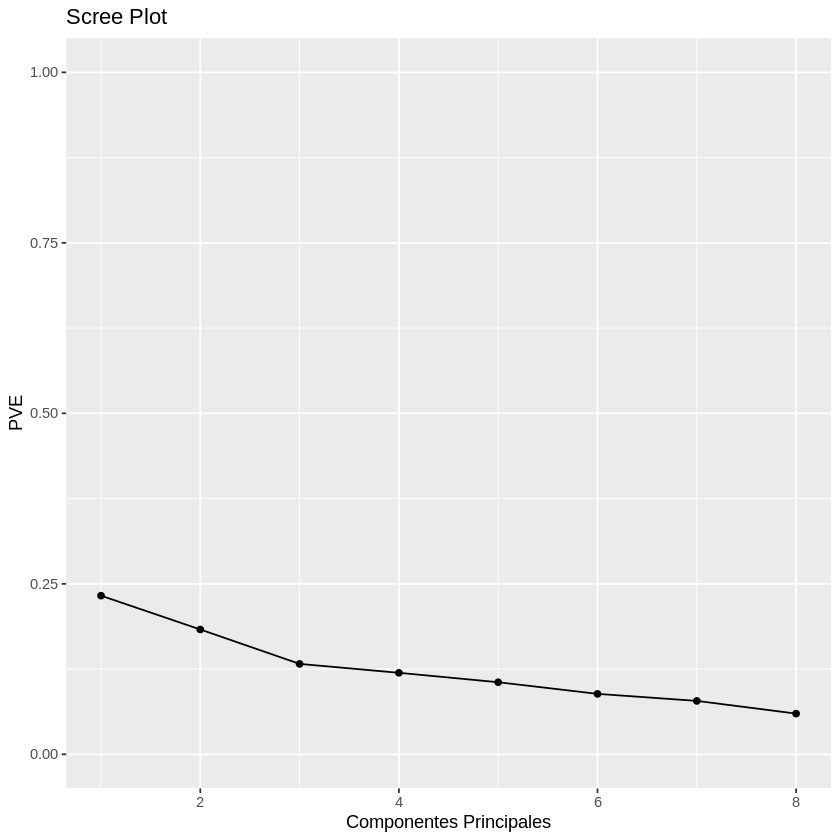

In [54]:
PVEplot

In [55]:
cumPVE <- qplot(c(1:8), cumsum(PVE)) + 
  geom_line() + 
  xlab("Componentes Principales") + 
  ylab("PVE acumulado") + 
  ggtitle("Scree Plot acumulado") +
  ylim(0,1)

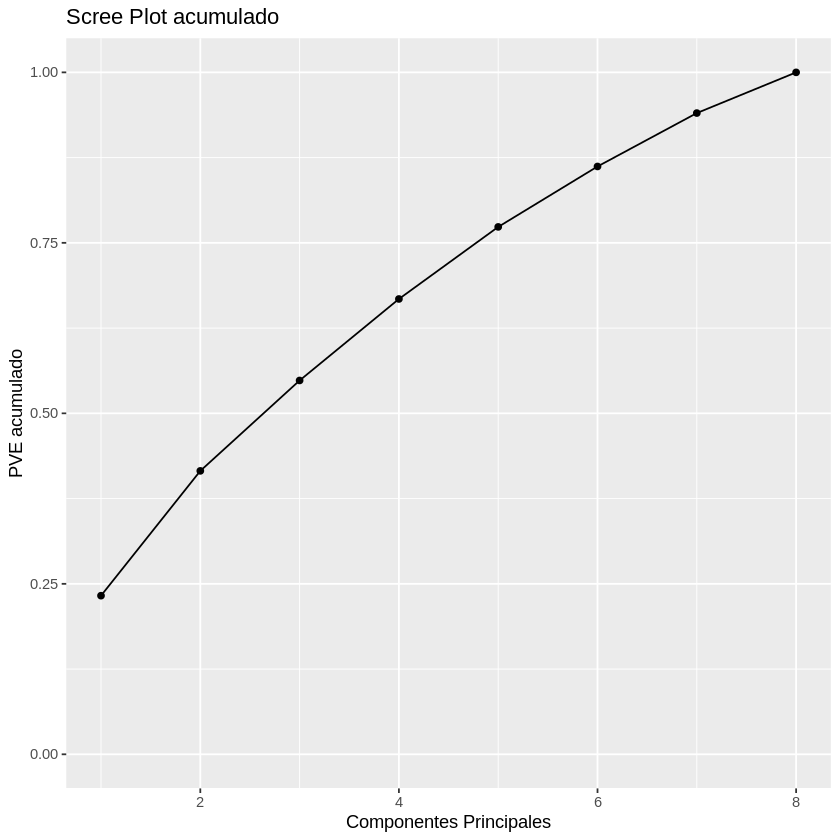

In [56]:
cumPVE

#### Funciones integradas

In [64]:
PCA_resultados <- prcomp(recursoshumanos02, scale = TRUE)

Los componentes de centro y escala corresponden a las medias y desviaciones estándar de las variables que se utilizaron para escalar antes de implementar PCA

In [65]:
names(PCA_resultados)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [66]:
(PCA_resultados$center)


NivelDeSatisfaccion       UltimaEvaluacion      NumeroDeProyectos 
            0.61283352             0.71610174             3.80305354 
HorasMensualesPromedio         TiempoDedicado     AccidenteDeTrabajo 
          201.05033669             3.49823322             0.14460964 
              Abandono        Promociona5Años 
            0.23808254             0.02126808

In [67]:
(PCA_resultados$scale)

NivelDeSatisfaccion       UltimaEvaluacion      NumeroDeProyectos 
             0.2486307              0.1711691              1.2325924 
HorasMensualesPromedio         TiempoDedicado     AccidenteDeTrabajo 
            49.9430994              1.4601362              0.3517186 
              Abandono        Promociona5Años 
             0.4259241              0.1442815

In [68]:
PCA_resultados$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NivelDeSatisfaccion,0.189561861,-0.6082581,0.14578963,-0.253499104,-0.32268329,-0.24332960,-0.29102170,-0.51043559
UltimaEvaluacion,-0.463637154,-0.3122288,0.15715943,-0.103072477,-0.06471173,-0.52257837,0.54777287,0.27367838
NumeroDeProyectos,-0.557047026,-0.1225429,0.01295210,0.098583382,0.18879420,0.47335058,0.24157676,-0.58883958
HorasMensualesPromedio,-0.525595871,-0.1785367,0.11339814,0.012068098,0.25349244,-0.02274205,-0.72147388,0.30588994
TiempoDedicado,-0.333951324,0.1170926,-0.44415687,-0.045699122,-0.79303045,0.16013636,-0.09314767,0.11038416
AccidenteDeTrabajo,0.064439228,-0.2814044,-0.42577604,0.813156642,0.06549289,-0.25312908,-0.02938544,-0.07016424
Abandono,-0.216339403,0.6163127,0.01069646,0.008161907,0.01364792,-0.58392171,-0.16219105,-0.45356155
Promociona5Años,0.008708814,-0.1135893,-0.74989628,-0.501867708,0.39801173,-0.11154387,0.02283486,-0.03780465


In [69]:
PCA_resultados$rotation = -PCA_resultados$rotation
PCA_resultados$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NivelDeSatisfaccion,-0.189561861,0.6082581,-0.14578963,0.253499104,0.32268329,0.24332960,0.29102170,0.51043559
UltimaEvaluacion,0.463637154,0.3122288,-0.15715943,0.103072477,0.06471173,0.52257837,-0.54777287,-0.27367838
NumeroDeProyectos,0.557047026,0.1225429,-0.01295210,-0.098583382,-0.18879420,-0.47335058,-0.24157676,0.58883958
HorasMensualesPromedio,0.525595871,0.1785367,-0.11339814,-0.012068098,-0.25349244,0.02274205,0.72147388,-0.30588994
TiempoDedicado,0.333951324,-0.1170926,0.44415687,0.045699122,0.79303045,-0.16013636,0.09314767,-0.11038416
AccidenteDeTrabajo,-0.064439228,0.2814044,0.42577604,-0.813156642,-0.06549289,0.25312908,0.02938544,0.07016424
Abandono,0.216339403,-0.6163127,-0.01069646,-0.008161907,-0.01364792,0.58392171,0.16219105,0.45356155
Promociona5Años,-0.008708814,0.1135893,0.74989628,0.501867708,-0.39801173,0.11154387,-0.02283486,0.03780465


In [70]:
PCA_resultados$x <- - PCA_resultados$x
head(PCA_resultados$x)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
-1.304178,-2.4407922,-0.02992833,0.03555404,-0.08220228,0.8550065,0.28969984,0.04258661
2.416399,-0.3783069,0.06344015,0.49107346,1.22456703,0.8402506,0.84547827,0.94048905
3.548321,-1.6348919,-0.20242619,-0.42536723,-1.10671755,-0.3181370,-0.40127918,0.53734862
1.865335,-0.6150049,-0.11446908,0.39365465,0.77934875,0.8843994,0.09265197,1.07472581
-1.302592,-2.4763479,-0.01942419,0.01885328,-0.10911252,0.8156005,0.33888855,0.02579597
-1.450406,-2.4364213,-0.01089266,0.04904300,-0.03430624,0.7909556,0.36303667,0.17664162


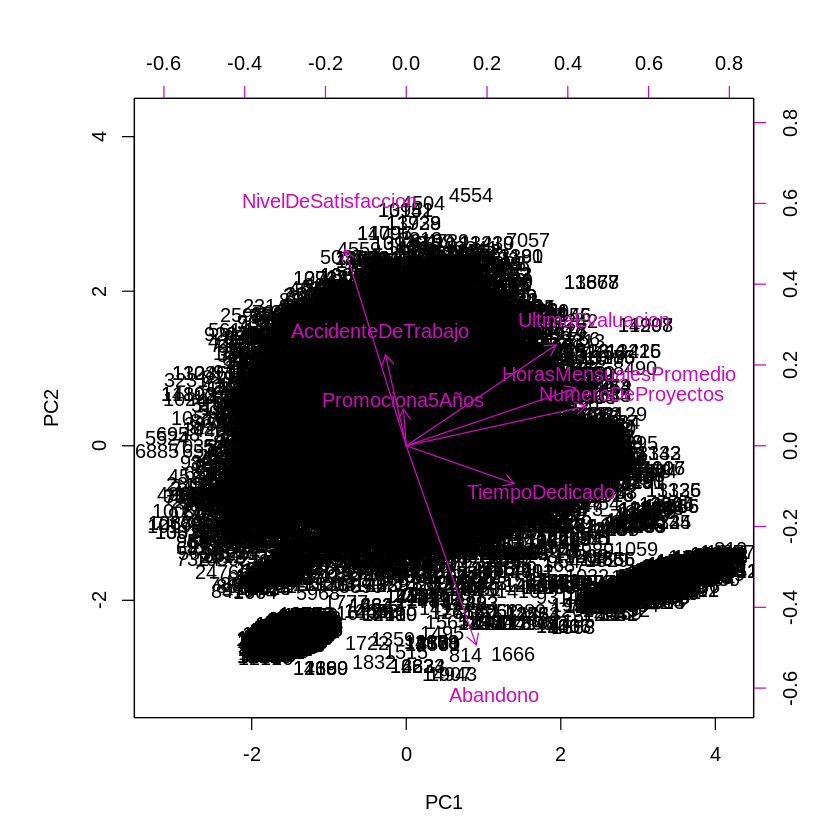

In [105]:
biplot(PCA_resultados, scale = 0, col = c(1,6))

### Segundo método Análisis de Componentes Principales

In [73]:
?biplot